<a href="https://colab.research.google.com/github/skhetrapal/kaggle_projects/blob/main/Kaggle_spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/My Drive/Colab data/Kaggle/spaceship-titanic/train.csv'
test_path = '/content/drive/My Drive/Colab data/Kaggle/spaceship-titanic/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
test_df['Transported'] = False

In [ ]:
df = pd.concat([train_df, test_df], axis = 0)

In [ ]:
print(test_df.shape)
print(train_df.shape)
print(df.shape)

(4277, 14)
(8693, 14)
(12970, 14)


In [ ]:
df = df.drop(columns = ['Name'])

In [ ]:
df.isna().sum()/df.shape[0]*100

,0
PassengerId,0.000000
HomePlanet,2.220509
CryoSleep,2.390131
Cabin,2.305320
Destination,2.112567
Age,2.081727
VIP,2.282190
RoomService,2.027756
FoodCourt,2.228219
ShoppingMall,2.359291


In [ ]:
df = df.set_index('PassengerId')
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
for col in df.columns:
  print(col, df[col].unique())
  print('***'*10)

HomePlanet ['Europa' 'Earth' 'Mars' nan]
******************************
CryoSleep [False True nan]
******************************
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
******************************
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
******************************
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
******************************
VIP [False True nan]
******************************
RoomService [   0.  109.   43. ... 1278. 2835.  652.]
******************************
FoodCourt [   0.    9. 3576. ...  873. 4813.  601.]
******************************
ShoppingMall [   0.   25.  371. ... 2156. 1258. 3851.]
******************************
Spa [   

In [ ]:
#  separate column Cabin into 3 separated by '/'

# Assuming 'Cabin' column exists and has the format 'deck/num/side'
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [ ]:
df= df.drop(columns = ['Cabin'])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [ ]:
for col in df.columns:
  print(col, df[col].unique())
  print('***'*10)

HomePlanet ['Europa' 'Earth' 'Mars' nan]
******************************
CryoSleep [False True nan]
******************************
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
******************************
Age [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
******************************
VIP [False True nan]
******************************
RoomService [   0.  109.   43. ... 1278. 2835.  652.]
******************************
FoodCourt [   0.    9. 3576. ...  873. 4813.  601.]
******************************
ShoppingMall [   0.   25.  371. ... 2156. 1258. 3851.]
******************************
Spa [   0.  549. 6715. ... 1872. 1716. 1812.]
******************************
VRDeck [    0.    44.    49. 

In [ ]:
df['Expenditure'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
df = df.drop(columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side,Expenditure
PassengerId,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,B,0,P,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,F,0,S,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,A,0,S,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,A,0,S,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,F,1,S,1091.0


In [ ]:
for col in df.select_dtypes(include='object').columns:
  df[col] = df[col].fillna(df[col].mode()[0])

<ipython-input-107-06d6e52b8739>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
mapping = {'T': 0 , 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E':5, 'F': 6, 'G': 7}
df['Deck'] = df['Deck'].map(mapping)

In [ ]:
df[['Deck','Expenditure']].corr()

,Deck,Expenditure
Deck,1.000000,-0.391007
Expenditure,-0.391007,1.000000


In [ ]:
mapping = {'S': 0 , 'P': 1}
df['Side'] = df['Side'].map(mapping)

In [ ]:
df = pd.get_dummies(df, columns = ['HomePlanet', 'Destination'])
df.head()

,CryoSleep,Age,VIP,Transported,Deck,Num,Side,Expenditure,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
PassengerId,,,,,,,,,,,,,,
0001_01,False,39.0,False,False,2,0,1,0.0,False,True,False,False,False,True
0002_01,False,24.0,False,True,6,0,0,736.0,True,False,False,False,False,True
0003_01,False,58.0,True,False,1,0,0,10383.0,False,True,False,False,False,True
0003_02,False,33.0,False,False,1,0,0,5176.0,False,True,False,False,False,True
0004_01,False,16.0,False,True,6,1,0,1091.0,True,False,False,False,False,True


In [ ]:
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors = 5)

df = pd.DataFrame(impute.fit_transform(df), columns = df.columns)

In [ ]:
df.describe()

,CryoSleep,Age,VIP,Transported,Deck,Num,Side,Expenditure,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,0.353200,28.747294,0.021049,0.337548,5.330146,591.577332,0.484965,1469.829391,0.551503,0.241557,0.206939,0.203624,0.091288,0.705089
std,0.477983,14.275375,0.143552,0.472892,1.747062,512.953469,0.499793,2734.067222,0.497359,0.428044,0.405127,0.402708,0.288029,0.456020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,4.000000,156.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,6.000000,409.000000,0.000000,753.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,1.000000,7.000000,992.000000,1.000000,1516.150000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,79.000000,1.000000,1.000000,7.000000,1894.000000,1.000000,35987.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
correlation = df.corr()

<Axes: >

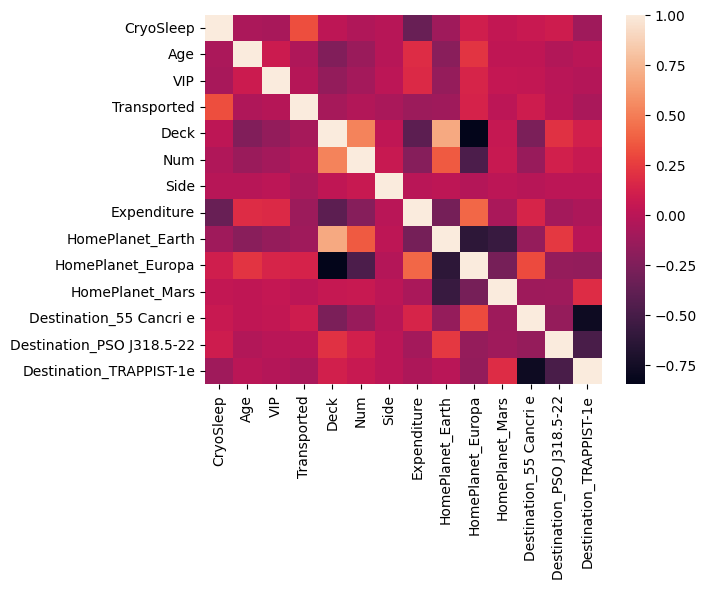

In [ ]:
sns.heatmap(correlation)

In [ ]:
df_train = df[:len(train_df)]
df_test = df[len(train_df):]

In [ ]:
df_test = df_test.drop(columns = ['Transported'])

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_train.drop(columns = ['Transported'])
y = df_train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
# prompt: suggest more models to classify
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# ... (Your existing code) ...

# Additional models
models = {
    "XGBoost": xgb.XGBClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Training XGBoost...
XGBoost Accuracy: 0.7584818861414606
Training Logistic Regression...
Logistic Regression Accuracy: 0.7291546866014951
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Accuracy: 0.7481311098332375
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.7636572742955722
Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.6831512363427257


In [ ]:

# Predict on the test set using the trained Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_test = gb_model.predict(df_test)

# You can now use y_pred_test for further analysis or submission
y_pred_test

array([1., 0., 1., ..., 1., 0., 1.])

In [ ]:
test_df['Transported'] = y_pred_test == 1.

In [ ]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False


In [ ]:
submission_df = test_df[['PassengerId','Transported']].set_index('PassengerId')
submission_df.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,False


In [ ]:
submission_df.to_csv('submission.csv')